Обучение без учителя преследует за собой две основные задачи:

- сжатие размерности

- кластеризация

# Кластеризация

## k-means

Метод k-means – это один из наиболее популярных методов кластеризации. Основная идея метода заключается в том, что на каждой итерации пересчитывается центр масс (центроид) для каждого кластера, полученного на предыдущем шаге, затем объекты снова разбиваются на кластеры согласно тому, какой из новых центроидов находится ближе.

Более формально, алгоритм принимает на вход выборку $X_1, \dots, X_N$ и параметр $k$, указывающий необходимое число кластеров. Выходом алгоритма является набор из $k$ центроидов $\{\mu_1, \dots, \mu_k\}$, с помощью которых кластеризация осуществляется путём отнесения каждого объекту к ближайшему центроиду. Все точки внутри одного кластера ближе к центроиду этого кластера, чем к центроиду любого другого кластера.

Метод может быть сформулирован как задача оптимизации, а именно, минимизации суммарного квадратичного отклонения точек кластеров от центров этих кластеров по центроидам и кластерам:$$\sum_{i=1}^k \sum_{X_n \in C_i} ||X_n - \mu_i||^2 \rightarrow \min, \text{где $C_i$ - это $i$-ый кластер, $\mu_i$ - это центр масс кластера $C_i$.}$$

Решение такой задачи оптимизации является NP-трудной задачей, однако существует простой итеративный алгоритм, позволяющий найти локальный минимум указанного функционала. Алгоритм представляет собой последовательное чередование двух шагов до сходимости.

**Алгоритм k-means**

1. Выбрать количество кластеров, которое нам кажется оптимальным для наших данных.

2. Выбрать случайным образом центроиды.

3. Для каждой точки нашего набора данных посчитать, к какому центроиду она ближе.

4. Переместить каждый центроид в центр той части выборки, которая отнесена к этому центроиду.

5. Повторять последние два шага фиксированное число раз, либо до тех пор, пока центроиды не "сойдутся"
(обычно это значит, что их смещение относительно предыдущего положения
не превышает какого-то заранее заданного небольшого значения).

Алгоритм гарантированно сходится,
однако не гарантируется достижение глобального минимума – а только одного из локальных минимумов.

Главным недостатком алгоритма является то, что итоговая кластеризация зависит от выбора исходных центров кластеров.

На практике алгоритм запускается несколько раз из различных начальных приближений, а полученные результаты некоторым образом усредняются.

Стоит также отметить, что число кластеров необходимо знать заранее. Существуют различные эвристики, позволяющие выбирать в некотором смысле оптимальное число кластеров.

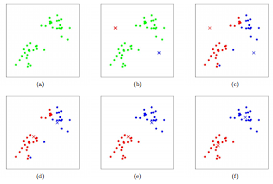



In [1]:
# Кластеризация игроков NBA
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
nba = pd.read_csv("/Users/iakubovskii/Machine_Learning/RANEPA/Fintech_2020/Машинное обучение/Данные/nba_2013.csv")
nba.head(3)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013


In [18]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter
kmeans = KMeans(n_clusters=5, random_state=1)
numeric_cols = nba._get_numeric_data().drop("season_end", axis=1).dropna(axis=1)
kmeans.fit(numeric_cols)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
numeric_cols_sc = sc.fit_transform(numeric_cols)
print(f"Распределение кластеров k-means = {Counter(kmeans.labels_)}")

Распределение кластеров k-means = Counter({3: 153, 0: 104, 4: 90, 2: 82, 1: 52})


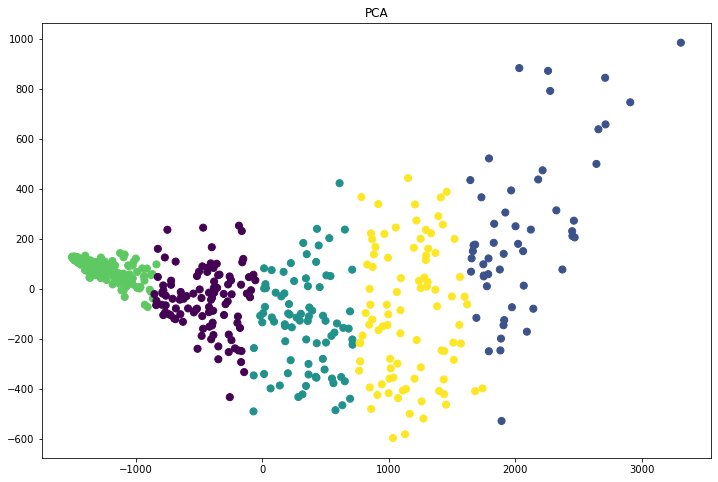

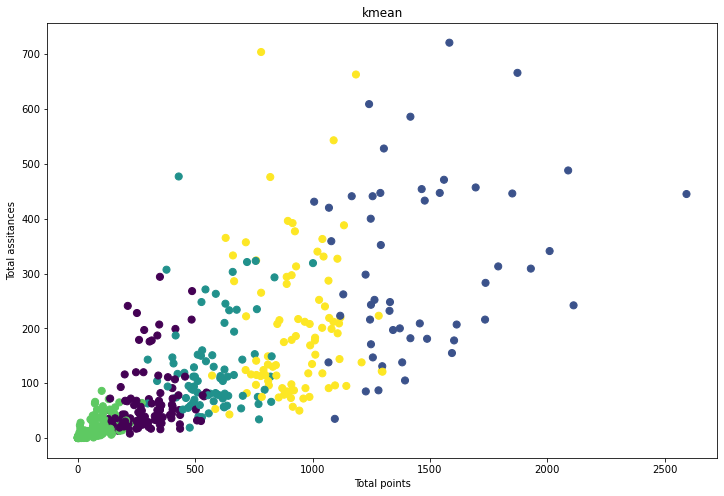

In [20]:
# Визуализируем при помощи PCA
pca = PCA(n_components=2)
res = pca.fit_transform(numeric_cols)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.title('PCA')

# Используем 2 признака: Total points и Total assists
plt.figure(figsize=(12,8))
plt.scatter(nba['pts'], nba['ast'], c=kmeans.labels_, s=50, cmap='viridis');
plt.xlabel('Total points');
plt.ylabel('Total assitances');
plt.title('kmean');

**Инициализация центроидов**

*Метод sklearn.KMeans* содержит параметры ***n_init*** (число запусков из различных начальных приближений) и ***init***. Есть три способа инициализации центроидов:

- k-means++ – "умная" инициализация центроидов для ускорения сходимости.

- random – случайная инициализация центроидов.

- ndarray – заданная инициализация центроидов.

(1797, 64)


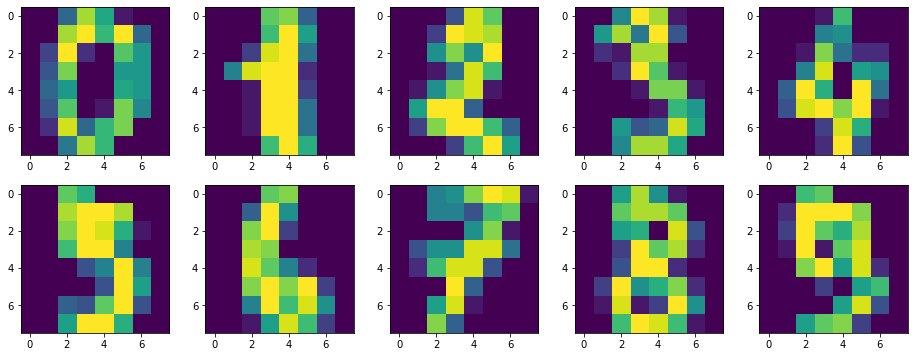

In [21]:
# Кластеризация рукописных цифр набора MNIST

from sklearn.datasets import load_digits

digits = load_digits()

X, y = digits.data, digits.target
print(X.shape)

# f, axes = plt.subplots(5, 2, sharey=True, figsize=(16,6))
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]));

Projecting 64-dimensional data to 2D


Text(0.5, 1.0, 'MNIST. PCA projection')

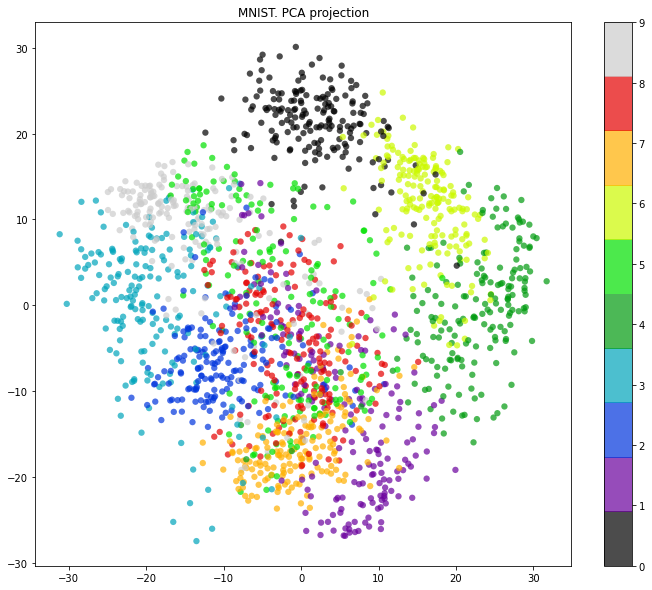

In [28]:
# Разделим цифры при помощи двумерных признаков

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

# Иерархическая кластеризация

Идея иерархической кластеризации заключается в том, что на первом шаге у нас
количество кластеров = количеству точек. Далее мы последовательно находим
ближайшие друг к другу точки и в конце алгоритма получаем один целый кластер,
состоящий из всех точек.
Иерархическая кластеризация бывает двух видов - аггломеративная и дивизиональная.
Рассмотрим здесь алгоритм аггломеративной кластеризации.

1. Каждая точка - отдельный кластер.

2. Формируем кластеры, которые состоят из двух ближайших друг к другу точек.

3. Повторяем то же самое для кластеров из шага 2 до момента пока не
останется 1 большой кластер.

4. В конце получаем дендрограмму, которая позволяет нам выделять уже какое-то
определенное количество кластеров.

Существует несколько способов измерять расстояние между кластерами:

- ближайшее расстояние

- наибольшее расстояние

- расстояние между центроидами двух кластеров

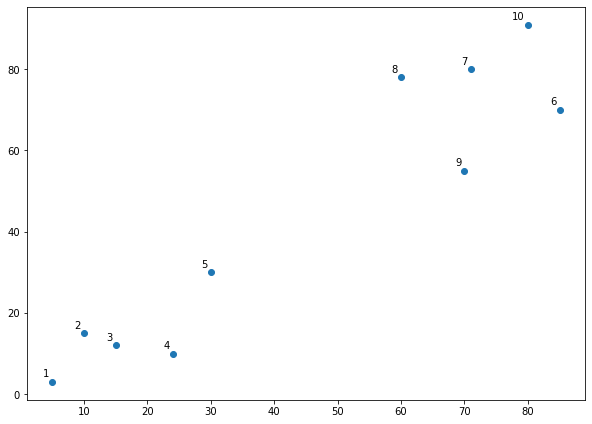

In [29]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

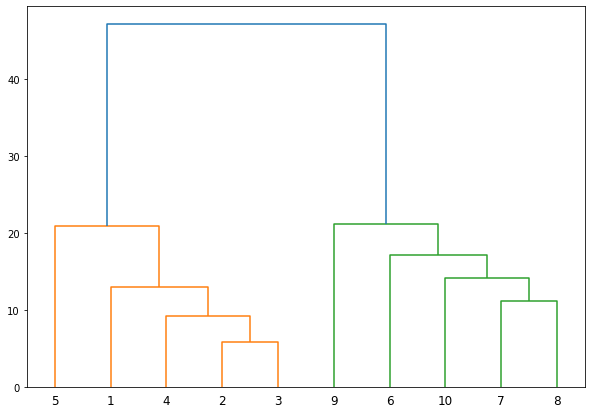

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

Видим, что в данном случае ярко-выражены 2 кластера.

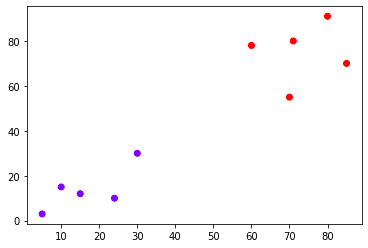

In [33]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
cluster.fit_predict(X)

plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

# Метрики кластеризации

Задача оценки качества кластеризации является более сложной по сравнению с оценкой качества классификации. Во-первых, такие оценки не должны зависеть от самих значений меток, а только от самого разбиения выборки. Во-вторых, не всегда известны истинные метки объектов, поэтому также нужны оценки, позволяющие оценить качество кластеризации, используя только неразмеченную выборку.

Выделяют внешние и внутренние метрики качества. Внешние используют информацию об истинном разбиении на кластеры, в то время как внутренние метрики не используют никакой внешней информации и оценивают качество кластеризации, основываясь только на наборе данных. Оптимальное число кластеров обычно определяют с использованием внутренних метрик.

Все указанные ниже метрики реализованы в sklearn.

## Adjusted Rand Index (ARI)

Предполагается, что известны истинные метки объектов. Данная мера не зависит от самих значений меток, а только от разбиения выборки на кластеры. Пусть $N$ – число объектов в выборке. Обозначим через $a$ число пар объектов, имеющих одинаковые метки и находящихся в одном кластере, через $b$ – число пар объектов, имеющих различные метки и находящихся в разных кластерах. Тогда Rand Index это$$\text{RI} = \frac{2(a + b)}{N(N-1)}.$$То есть это доля объектов, для которых эти разбиения (исходное и полученное в результате кластеризации) "согласованы". Rand Index (RI) выражает схожесть двух разных кластеризаций одной и той же выборки. Чтобы этот индекс давал значения близкие к нулю для случайных кластеризаций при любом $N$ и числе кластеров, необходимо нормировать его. Так определяется Adjusted Rand Index:$$\text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}.$$

Эта мера симметрична, не зависит от значений и перестановок меток. Таким образом, данный индекс является мерой расстояния между различными разбиениями выборки. $\text{ARI}$ принимает значения в диапазоне $[-1, 1]$. Значения, близкие к нулю соответствуют случайным разбиениям, а положительные значения говорят о том, что два разбиения схожи (совпадают при $\text{ARI} = 1$).

## Adjusted Mutual Information (AMI)

Данная мера очень похожа на $\text{ARI}$. Она также симетрична, не зависит от значений и перестановок меток. Определяется с использованием функции энтропии, интерпретируя разбиения выборки, как дискретные распределения (вероятность отнесения к кластеру равна доле объектов в нём). Индекс $MI$ определяется как взаимная информация для двух распределений, соответствующих разбиениям выборки на кластеры. Интуитивно, взаимная информация измеряет долю информации, общей для обоих разбиений: насколько информация об одном из них уменьшает неопределенность относительно другого.

Аналогично $\text{ARI}$ определяется индекс $\text{AMI}$, позволяющий избавиться от роста индекса $MI$ с увеличением числа классов. Он принимает значения в диапазоне $[0, 1]$. Значения, близкие к нулю, говорят о независимости разбиений, а близкие к единице – об их схожести (совпадении при $\text{AMI} = 1$).

## Homogeneity, completeness, V-measure

Формально данные меры также определяются с использованием функций энтропии и условной энтропии, рассматривая разбиения выборки как дискретные распределения:$$h = 1 - \frac{H(C\mid K)}{H(C)}, c = 1 - \frac{H(K\mid C)}{H(K)},$$здесь $K$ – результат кластеризации, $C$ – истинное разбиение выборки на классы. Таким образом, $h$ измеряет, насколько каждый кластер состоит из объектов одного класса, а $c$ – насколько объекты одного класса относятся к одному кластеру. Эти меры не являются симметричными. Обе величины принимают значения в диапазоне $[0, 1]$, и большие значения соответствуют более точной кластеризации. Эти меры не являются нормализованными, как $\text{ARI}$ или $\text{AMI}$, и поэтому зависят от числа кластеров. Случайная кластеризация не будет давать нулевые показатели при большом числе классов и малом числе объектов. В этих случаях предпочтительнее использовать $\text{ARI}$. Однако при числе объектов более 1000 и числе кластеров менее 10 данная проблема не так явно выражена и может быть проигнорирована.

Для учёта обеих величин $h$ и $c$ одновременно вводится $V$-мера как их среднее гармоническое:$$v = 2\frac{hc}{h+c}.$$Она является симметричной и показывает, насколько две кластеризации схожи между собой.



# Выбор оптимального количества кластеров

## Метод локтя

При кластеризации методом k-средних количество кластеров чаще всего оценивают с помощью «метода локтя».
Он подразумевает многократное циклическое исполнение алгоритма с увеличением количества выбираемых кластеров,
а также последующим откладыванием на графике балла кластеризации, вычисленного как функция от количества кластеров.


## Силуэт

В отличие от описанных выше метрик, силуэт не предполагает знания истинных меток объектов и
позволяет оценить качество кластеризации, используя только саму (неразмеченную) выборку и результат кластеризации.
Сначала силуэт определяется отдельно для каждого объекта. Обозначим через $a$ – среднее расстояние от данного объекта
до объектов из того же кластера, через $b$ – среднее расстояние от данного объекта до объектов из ближайшего кластера
(отличного от того, в котором лежит сам объект). Тогда силуэтом данного объекта называется величина:
$$s = \frac{b - a}{\max(a, b)}.$$
Силуэтом выборки называется средняя величина силуэта объектов данной выборки. Таким образом, силуэт показывает,
на сколько среднее расстояние до объектов своего кластера отличается от среднего расстояния до объектов других кластеров.
Данная величина лежит в диапазоне $[-1, 1]$. Значения, близкие к -1, соответствуют плохим (разрозненным) кластеризациям,
значения, близкие к нулю, говорят о том, что кластеры пересекаются и накладываются друг на друга, значения,
близкие к 1, соответствуют "плотным", четко выделенным кластерам. Таким образом, чем больше силуэт,
тем более четко выделены кластеры, и они представляют собой компактные, плотно сгруппированные облака точек.

С помощью силуэта можно выбирать оптимальное число кластеров $k$ (если оно заранее не известно) –
выбирается число кластеров, максимизирующее значение силуэта.
В отличие от предыдущих метрик, силуэт зависит от формы кластеров и достигает больших значений на более
выпуклых кластерах, получаемых с помощью алгоритмов, основанных на восстановлении плотности распределения.


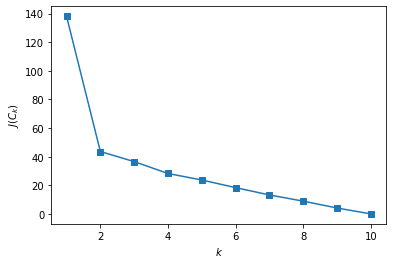

In [34]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1,11), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [45]:
from sklearn.metrics import (adjusted_rand_score,
                             adjusted_mutual_info_score,
                             homogeneity_score,
                             completeness_score,
                             v_measure_score,
                             silhouette_score)
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering

data = datasets.load_digits()
X, y = data.data, data.target

X_scal = sc.fit_transform(X)

algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=17))
algorithms.append(AgglomerativeClustering(n_clusters=10))

data = []
for algo in algorithms:
    algo.fit(X_scal)
    data.append(({
        'ARI': adjusted_rand_score(y, algo.labels_),
        'AMI': adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': homogeneity_score(y, algo.labels_),
        'Completeness': completeness_score(y, algo.labels_),
        'V-measure': v_measure_score(y, algo.labels_),
        'Silhouette': silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure',
                                           'Silhouette'],
                       index=['K-means', 'Agglomerative'])

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.467326,0.621687,0.602692,0.650365,0.625622,0.159816
Agglomerative,0.664346,0.793493,0.758491,0.836498,0.795587,0.154195


## DBSCAN (Density-based spatial clustering of applications with noise)

**Основная идея.**

В отличие от KMeans мы не хотим заранее задавать количество кластеров, мы
просто хотим найти кластера, которые являются некими сгустками данных,
поэтому нам нужно задать всего лишь *два параметра*.

Первый из них это *размер эпсилон окрестности* и *minPts*, что расшифровывается как минимальное количество
точек в этой самой эпсилон окрестности. Тогда наши точки можно разделить на три типа.

Первый тип точек - *core точки*, у которых в эпсилон окрестностей как минимум *minPts* соседей.
Далее идут *border точки* - точки, которые не являются *core точками*,
но являются достижимыми из *core точек*. Все остальные точки - это
*noise точки*, у которых в эпсилон окрестности меньше, чем *minPts* соседей,
и они недостижимы из других *core точек*.

Ниже на картинке изображен пример разделения точек на 3 типа.

![](https://www.researchgate.net/profile/Elias-Giacoumidis/publication/331586411/figure/fig1/AS:733955368173569@1552000004684/Example-of-DBSCAN-when-the-number-of-minimum-points-is-equal-to-4.ppm)

Описание алгоритма DBSCAN

1. Находим точки в $\epsilon$ окрестности каждой точки и выделяем *core точки* с более чем *minPts соседями*.

2. Определяем *border-точки* - точки, у которых меньше *min Pts* соседей,
но хотя бы один сосед - *core точка*.

3. Определяем *noise-точки* - они не принадлежат ни к одной из точек из первых
двух пунктов.

4. Находим связные компоненты *core точек*, игнорируя все остальные точки.
Последовательность связанных *core точек* через *border точки* будет являться кластером.

5. Помечаем *border точки* тем цветом кластера, с которыми они граничат.
В противном случае мы считаем точку *noise точкой*.

![](https://www.pvsm.ru/images/2017/02/20/interesnye-algoritmy-klasterizacii-chast-vtoraya-DBSCAN-3.png)

Данный алгоритм работает хорошо на довольно зашумленных данных и позволяет
выявить хитроумные кластеры. Например, вот такие.
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQjkj-Bg7HzIHgHgHPaZU2CgF9G9G9HN68wsw&usqp=CAU)

**Плюсы DBSCAN:**
- Не нужно задавать заранее количество кластеров так, как это было в алгоритме KMeans,
то есть DBSCAN может найти любое количество кластеров.

- В отличие от KMeans, кластеры могут быть причудливой формы

- Умеет работать с шумными данными, что позволяет выявлять кластеры,
которые KMeans или PCA выявить не в состоянии.

**Минусы:**

- На каждом шаге нужно искать ближайших соседей, и в худшем случае это будет квадратичный алгоритм
(у нас есть n точек и для каждой из них мы проверим все остальные n на то,
что они являются к ней ближайшими. В конечном счете получается, что задача решается
за $O(N^2)$: если n достаточно большое, например, миллион,
то эта задача решается слишком долго и к большим данным этот алгоритм не
рекомендуется к применению.

Есть ещё одна модификация этого алгоритма, который называется
иерархический DBSCAN. Это выходит за рамки нашего курса,
ничто не мешает ознакомиться с ним вам самим.
HDBSCAN считается одним из лучших алгоритмов кластеризации на сегодня.
Однако, применимость его к большим данным тоже вызывает сомнения.

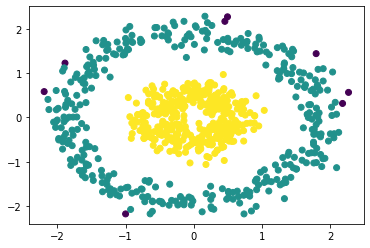

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred);

# Визуализация многомерного пространства при помощи t-SNE

Название метода – t-distributed Stohastic Neighbor Embedding. Основная идея довольно простая простая - нужно
найти такое отображение из многомерного признакового пространства на плоскость (или в 3D, но почти всегда выбирают 2D),
чтобы точки, которые были далеко друг от друга, на плоскости тоже оказались удаленными, а близкие точки –
также отобразились на близкие. По сути, neighbor embedding – это своего рода поиск нового представления данных,
при котором сохраняется соседство. В основе метода лежит метрика расстояний между точками. Соответственно, как и в случае
метода kNN, перед применением t-SNE мы должны стандартизировать все признаки.
Подробней с методом можете ознакомиться [тут](https://habr.com/ru/post/267041/).

Text(0.5, 1.0, 'MNIST. t-SNE projection')

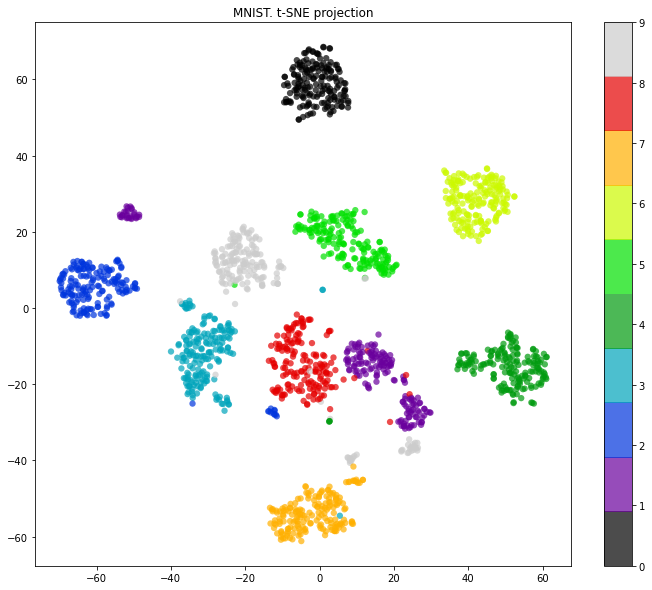

In [66]:
# Визуализация цифр из набора MNIST при помощи t-SNE.
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)
X, y = digits.data, digits.target
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection')